'''
save_fig and tight_layout: not tight_layout for decision tree 
'''

## 1. Training and Visualizing a Decision Tree

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('seaborn')

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
 
iris = load_iris()
X = iris['data'][:, 2:]
y = iris['target']

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

iris.feature_names, iris.target_names

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [3]:
PROJECT_ROOT_DIR = '.'
CHAPTER_ID = '06'
import os
def safe_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, 'img', CHAPTER_ID, fig_id + '.png')
    print('saving figures', fig_id)
    if tight_layout: 
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

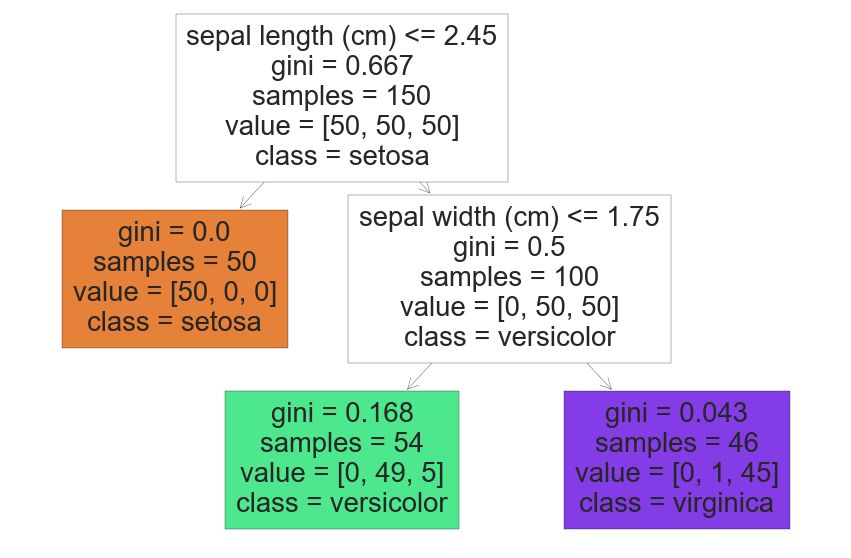

In [4]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 10))
plot_tree(
    tree_clf,
    feature_names=iris.feature_names,  
    class_names=iris.target_names,
    filled=True,
)
plt.savefig('plot_iris_tree.png')
plt.show()
## fig.savefig 

In [5]:
from sklearn.tree import export_graphviz
dot_data = export_graphviz(
    tree_clf,
    out_file = 'iris_tree.dot',
    feature_names = iris.feature_names[2:],
    class_names = iris.target_names,
    filled = True,
    rounded = True
)

In [6]:
import graphviz
graph = graphviz.Source(dot_data, format="png")

In [7]:
## $ dot -Tpng iris_tree.dot -o  iris_tree.png 
## from subprocess import check_call
## check_call(['dot','-Tpng','iris_tree.dot','-o','iris_tree.png'])
## make sure the Graphviz executables are on your systems' PATH
## https://www.mmbyte.com/article/8284.html
## https://mljar.com/blog/visualize-decision-tree/#:~:text=A%20Decision%20Tree%20is%20a,data%20sample%20a%20target%20value.&text=Classification%20trees%20used%20to%20classify,scikit%2Dlearn%20it%20is%20DecisionTreeClassifier%20.

## 2. Making Predictions 

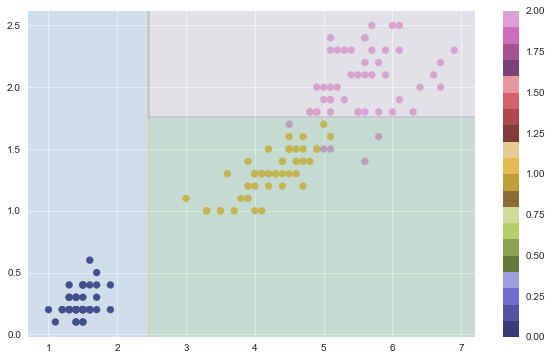

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='tab20b')
plt.colorbar()
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
XX = np.linspace(xlim[0], xlim[1], 100)
YY = np.linspace(ylim[0], ylim[1], 100)
XX, YY = np.meshgrid(XX, YY)
XY = np.c_[XX.ravel(), YY.ravel()]
Z = tree_clf.predict(XY).reshape(XX.shape)
plt.contourf(XX, YY, Z, alpha=0.2, cmap='tab20c')
plt.show()
## plt.contourf(): filled contour 

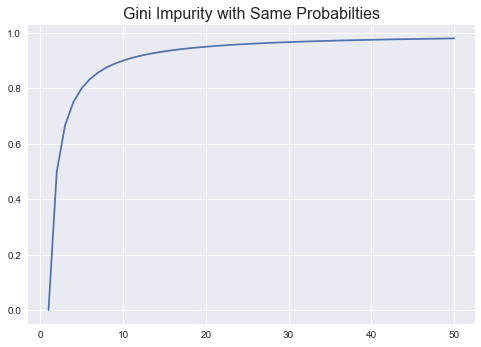

In [9]:
n = np.arange(1, 51)
G = 1 - (1 / n) ** 2 * n
plt.plot(n, G)
plt.title('Gini Impurity with Same Probabilties', fontsize=16)
plt.show()

## 3. Estimating Class Probabilities

In [10]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

## 4. The CART Algorithm 

In [11]:
## classification and regression tree algorithm 

## 5. Computational Complexity 